# OSM Data Exploration

## Extraction of districts from shape files
For our experiments we consider two underdeveloped districts Araria, Bihar and Namsai, Arunachal Pradesh, the motivation of this comes from this [dna](https://www.dnaindia.com/india/report-out-of-niti-aayog-s-20-most-underdeveloped-districts-19-are-ruled-by-bjp-or-its-allies-2598984) news article, quoting a Niti Aayog Report. We also consider a developed city Bangalore in the south of India.

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()
import sys
sys.path.insert(0, '../dataio')
import osm_data_extraction as ode

india_shape = os.environ.get("DATA_DIR") + "/gadm36_shp/gadm36_IND_2.shp"

/media/veracrypt1/.virtualenvs/laguerre-voronoi-Nqc-oPYY/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


ModuleNotFoundError: No module named 'contextily'

In [ ]:
import geopandas as gpd 
import matplotlib.pyplot as plt 
%matplotlib inline
india_gpd = gpd.read_file(india_shape)
india_gpd.plot();

In [ ]:
araria_gdf = ode.extract_district_dataframe(india_gpd, 'Araria')
araria_gdf.plot()

## Fetch Open Street Map Data within Boundaries as Data Frame
We use 'add_basemap' function of contextily to add a background map to our plot and make sure the added basemap has the same co-ordinate system (crs) as the boundary extracted from the shape file.

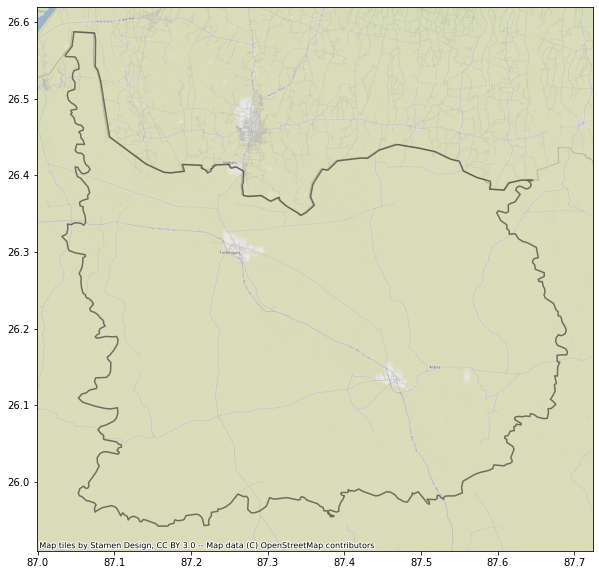

In [4]:
ode.plot_district_boundary_on_osm_tile(araria_gdf, 10, 1.5, 12)

In [5]:
#Writes to a geotif file
ode.write_district_osm_tile(araria_gdf, "araria.tif")

True

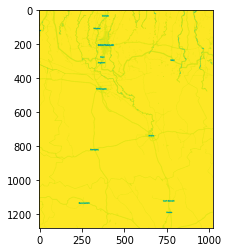

In [6]:
ode.plot_district_tif(os.environ.get("OSM_DIR") + "araria.tif", 9)

In [8]:
(araria_poly, araria_graph) = ode.create_district_knots_and_edges_model(araria_gdf)

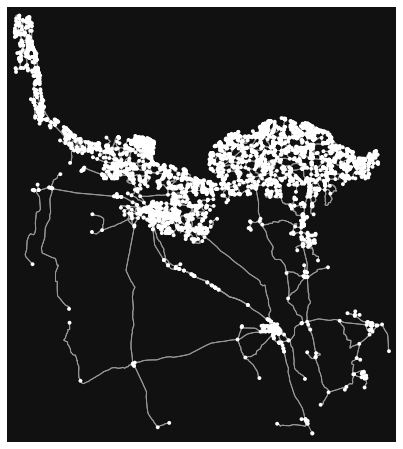

<Figure size 648x648 with 0 Axes>

In [9]:
import osmnx as ox
araria_kefig, araria_ax = ox.plot_graph(araria_graph)
plt.tight_layout()

In [10]:
tags = {'amenity':True, 'building':True, 'emergency':True, 'highway':True, 'footway':True, 'landuse': True, 'water': True}
araria_osmdf = ode.extract_osm_csv(araria_poly, tags)

In [11]:
araria_osmdf.head()

unique_id       osmid element_type  \
0  node/7123319493  7123319493         node   
1  node/7123481639  7123481639         node   
2  node/7131577454  7131577454         node   
3  node/7805608966  7805608966         node   
4    way/121483195   121483195          way   

                                            geometry    addr:district  \
0                          POINT (87.32768 26.19384)       Samastipur   
1                          POINT (87.12850 26.14488)  Purba Champaran   
2                          POINT (87.23529 26.08665)  Purba Champaran   
3                          POINT (87.10953 26.23905)           Araria   
4  LINESTRING (87.32236 26.09899, 87.32257 26.099...              NaN   

     addr:full addr:postcode addr:state addr:subdistrict   amenity  ... width  \
0      Simraha        854318      Bihar       Warisnagar  hospital  ...   NaN   
1          NaN        854334      Bihar    Chakia(Pipra)  hospital  ...   NaN   
2    Nasriganj           NaN      Bihar           Patahi  hospital  ...   NaN   
3  Gokhula Pur        803108      Bihar              NaN  hospital  ...   NaN   
4          NaN           NaN        NaN              NaN       NaN  ...   NaN   

  level tunnel craft area intermittent ways type trees maxheight  
0   NaN    NaN   NaN  NaN          NaN  NaN  NaN   NaN       NaN  
1   NaN    NaN   NaN  NaN          NaN  NaN  NaN   NaN       NaN  
2   NaN    NaN   NaN  NaN          NaN  NaN  NaN   NaN       NaN  
3   NaN    NaN   NaN  NaN          NaN  NaN  NaN   NaN       NaN  
4   NaN    NaN   NaN  NaN          NaN  NaN  NaN   NaN       NaN  

[5 rows x 71 columns]

In [12]:
araria_osmdf.to_csv(os.environ.get("OSM_DIR") + "araria_osmdf.csv")

/media/veracrypt1/.virtualenvs/WRI_India_ext-hyHLP5Re/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:

!python ../apps/download-nightlights.py 'Araria' '2015-01-01' '2015-01-05'


/media/veracrypt1/.virtualenvs/WRI_India_ext-hyHLP5Re/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
If you read this line it means you have provided all the parameters.
DEBUG:fiona.env:Entering env context: <fiona.env.Env object at 0x7f63fa166520>
DEBUG:fiona.env:Starting outermost env
DEBUG:fiona.env:No GDAL environment exists
DEBUG:fiona.env:New GDAL environment <fiona._env.GDALEnv object at 0x7f63fa166490> created
DEBUG:fiona._env:Logging error handler pushed.
DEBUG:fiona._env:All drivers registered.
DEBUG:fiona._env:GDAL_DATA found in environment: '/media/veracrypt1/.virtualenvs/WRI_India_ext-hyHLP5Re/lib/python3.8/site-packages/fiona/gdal_data'.
DEBUG:fiona._env:PROJ data files are available at built-in paths
DEBUG:fiona._env:Started GDALEnv <fiona._env.GDALEnv object at 0x7f63